# Python pour la Physique - Exemples

In [1]:
# imports canoniques, une fois pour tout le notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

## Le Pendule

### petites oscillations

`x` est la distance parcourue par le pendule entre la verticale et l’angle θ

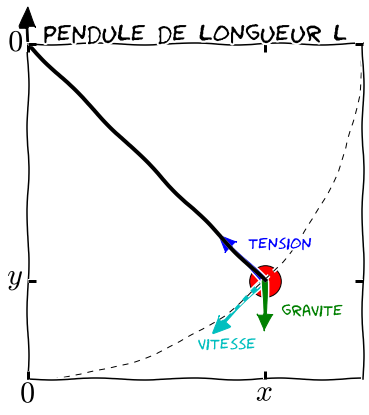

![](pendule2.png)

- acceleration = x''= $-g*sin(θ)$
- x = $L*θ$
- donc L*θ'' = $-g*sin(θ)$
- donc θ'' = $(-g/L)*sin(θ)$


In [2]:
g = 9.8
L = 1
# vous n'êtes pas obligé·es d'utiliser des lettres grecques, mais vous pouvez
ω = np.sqrt(g / L)
theta_0 = 0.31


def theta(t):
    return theta_0 * np.cos(ω * t)

In [3]:
theta(0)  # simple test de la fonction

0.31

In [4]:
theta(0.8)  # simple test de la fonction

-0.24916771725450115

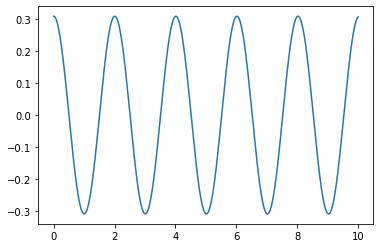

In [5]:
# représentation graphique simple et rapide
t = np.linspace(0, 10, 1000) # tableau de valeurs de t, entre 0 et 10, avec 1000 valeurs
y = theta(t) # y est un tableau contenant theta(t) pour chaque élément du tableau t.

plt.plot(t,y)
plt.show()

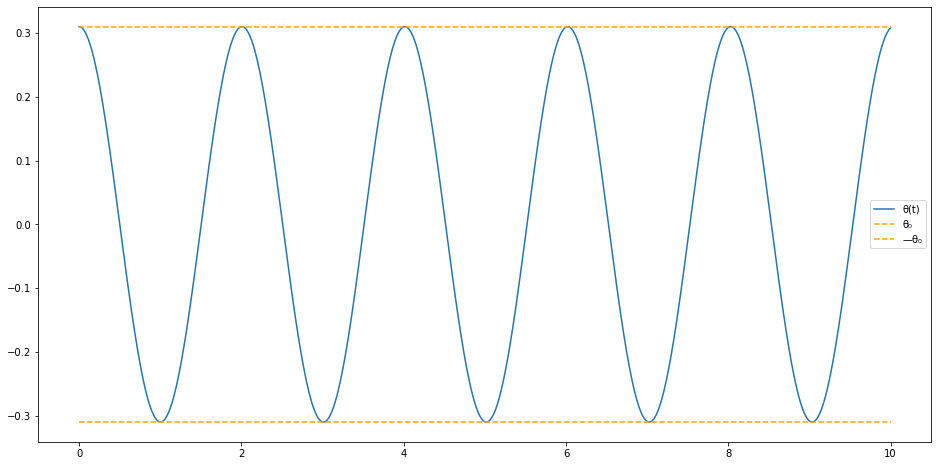

In [6]:
# représentation graphique un peu plus élaborée
# t et y = θ(t) sont déjà définis plus haut

plt.figure(figsize=(16, 8))  # taille du graphe
plt.plot(t, y, label='θ(t)')  # l’argument label est utilisé dans la légende
plt.plot(t, [theta_0] * len(t), '--', c='orange', label='θ₀')
plt.plot(t, [-theta_0] * len(t), '--', c='orange', label='—θ₀')
plt.legend()  # pour faire apparaître la légende
plt.show() # pour faire apparaître le graphe

In [7]:
# Calcul de la période : identifier les deux premiers passages par 0 et en déduire la période

# on initialise une variable qui contiendra à terme la position du premier élément de l'échantillon où on passe par 0

k1 = 0
while y[k1] > 0:
    k1 += 1 # on incrémente k1 jusqu'à ce que la condition y[k1] > 0 soit fausse

k2 = k1  # k2 sera la position de notre second passage par 0. on l'initialise à la valeur du premier passage

while y[k2] < 0:
    k2 += 1

demi_periode = (k2 - k1) 
periode = demi_periode * 2
print(f"{periode=}")

periode=200


## Nombres complexes

Une implémentation des nombres complexes en Python  est accessible de base dans Python, sans importer aucune bibliothèque supplémentaire.

### Opérations de base sur les complexes

In [8]:
c1 = 3 + 2j

In [9]:
type(c1) # vérification du type de l'objet c1

complex

In [10]:
c1.real # l'attribut .real renvoie la composante réelle du complexe c1

3.0

In [11]:
c1.imag  # l'attribut .imag renvoie la composante imaginaire du complexe c1

2.0

In [12]:
c1.conjugate() # cette méthode .conjugate() retourne le complexe conjugué de c1

(3-2j)

In [13]:
c2 = 2 + 1j # créons un second nombre complexe pour réaliser des opérations de base

In [14]:
c1 + c2

(5+3j)

In [15]:
c1 - c2

(1+1j)

In [16]:
c1 * c2

(4+7j)

In [17]:
c1 / c2

(1.6+0.2j)

In [18]:
c2 * c2.conjugate()

(5+0j)

In [19]:
c1**2

(5+12j)

### Grapher les complexes

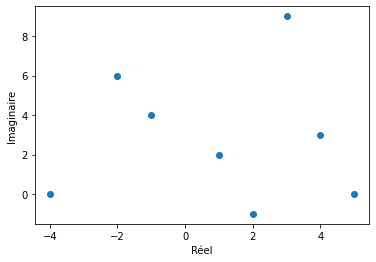

In [20]:
# créons une liste de nombres complexes
nb_complexes = [1+2j, -1+4j, 4+3j, -4, 2-1j, 3+9j, -2+6j, 5]
  
# extract real part
x = [nb.real for nb in nb_complexes] # .real sur chaque nombre de la liste pour lister les parties réelles
# extract imaginary part
y = [nb.imag for nb in nb_complexes] # .imaq sur chaque nombre de la liste pour lister les parties imaginaires
  
# plot the complex numbers
plt.scatter(x, y) # scatter place les points sur le graphe, un par un
plt.ylabel('Imaginaire')
plt.xlabel('Réel')
plt.show()

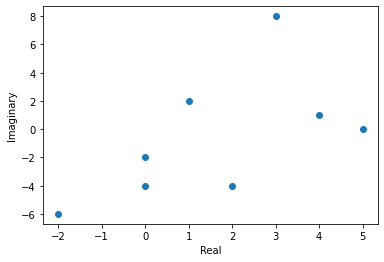

In [21]:
# On peut aussi transformer une liste de complexes en array numpy
data = np.array([1+2j, 2-4j, -2j, -4j, 4+1j, 3+8j, -2-6j, 5])
  
# les valeurs réelles s'obtiennent plus facilement
x = data.real

# idem pour imaginaires
y = data.imag
  
# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

## Droites d’incertitude

<div class ='alert alert-info'>

Jouez avec `coeff1` et `ordonnee1` pour trouver la droite la plus pentue qui passe par toutes les barres d'incertitude.

Jouez avec `coeff2` et `ordonnee2` pour trouver la droite la moins pentue qui passe par toutes les barres d'incertitude.
</div>

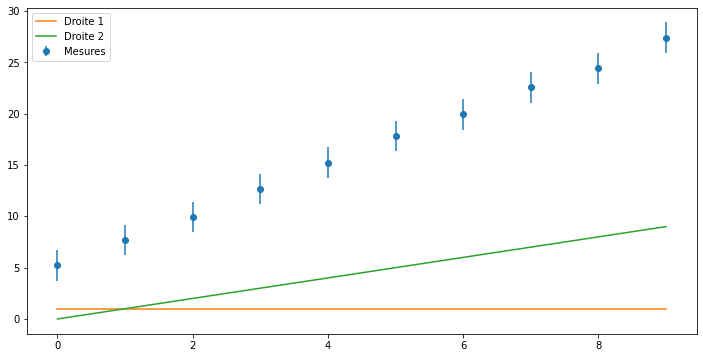

In [22]:
# Mesures enregistrées en x et y
x = np.array(range(10))
y = 2.5 * x + 0.2 * np.random.normal(size=len(x)) + 5


# création de la figure et de l'ax
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)


# coefficient directeur et ordonnée à l'origine de la droite 1
coeff1 = 0
ordonnee1 = 1

# coefficient directeur et ordonnée à l'origine de la droite 2
coeff2 = 1
ordonnee2 = 0

# y1 et y2 sont des droites.
y1 = coeff1 * x + ordonnee1
y2 = coeff2 * x + ordonnee2


# graphe de x et y, avec barres d'erreur
ax.errorbar(x, y, yerr=1.5, fmt='o', label='Mesures')


plt.plot(x, y1, label='Droite 1')
plt.plot(x, y2, label='Droite 2')

plt.legend()
plt.show()

<div class = 'alert alert-success'>
Exemple de résolution à tatons
   </div>

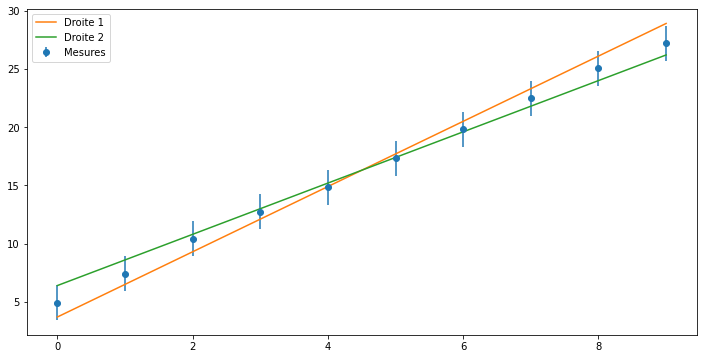

In [23]:
# Mesures enregistrées en x et y
x = np.array(range(10))
y = 2.5 * x + 0.2 * np.random.normal(size=len(x)) + 5


# création de la figure et de l'ax
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)


# coefficient directeur et ordonnée à l'origine de la droite 1
coeff1 = 2.8004
ordonnee1 = 3.7

# coefficient directeur et ordonnée à l'origine de la droite 2
coeff2 = 2.2
ordonnee2 = 6.4

# y1 et y2 sont des droites.
y1 = coeff1 * x + ordonnee1
y2 = coeff2 * x + ordonnee2


# graphe de x et y, avec barres d'erreur
ax.errorbar(x, y, yerr=1.5, fmt='o', label='Mesures')


plt.plot(x, y1, label='Droite 1')
plt.plot(x, y2, label='Droite 2')

plt.legend()
plt.show()

## Sinusoïdes déphasées et sommées

Ce exemple utilise un module `ipywidgets` pour créer un slider qui permet de faire varier phi et retracer le graphe directement.

Si vous n’avez pas `ipywidgets` installé, vous pouvez utiliser 

`conda install -c anaconda ipywidgets`

si vous utilisez anaconda ou bien

`pip install ipywidgets` si vous utilisez un environnement python sans anaconda.

**NB** : redémarrez Jupyter Notebook complètement après installation.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [25]:
t = np.linspace(0, 2, 1000)
w = 10
phi = 2

def sinus_dephase(phi):
    s1 = np.sin(t*w)
    s2= np.sin(t*w + phi)
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    plt.xlabel('temps', loc='right')
    plt.ylabel('signal', rotation=None, loc='top')
    plt.plot(t, s1, label='S1 = sin(t*w)')
    plt.plot(t, s2, label='S2 = sin(t*w+phi)')
    plt.plot(t, s1 + s2, label='S1 + S2')

    plt.legend()
    plt.show()




In [26]:
interact(sinus_dephase, phi=(0.0,2*np.pi, 0.1));

interactive(children=(FloatSlider(value=3.1, description='phi', max=6.283185307179586), Output()), _dom_classe…

Alternative : [ce graphe dans desmos](https://www.desmos.com/calculator/ndcmj18bic)